Please upload your data file:


Saving Table 21.1.txt to Table 21.1.txt
Data loaded successfully!
           GDP     PDI     PCE  PROFITS  DIVIDENDS
Year                                              
1970.1  2872.8  1990.6  1800.5     44.7       24.5
1970.2  2860.3  2020.1  1807.5     44.4       23.9
1970.3  2896.6  2045.3  1824.7     44.9       23.3
1970.4  2873.7  2045.2  1821.2     42.1       23.1
1971.1  2942.9  2073.9  1849.9     48.8       23.8
Index after conversion:
DatetimeIndex(['1970-01-01', '1970-04-01', '1970-07-01', '1970-10-01',
               '1971-01-01'],
              dtype='datetime64[ns]', freq=None)

ADF Test for GDP:
ADF Statistic: 0.7317376139820075
p-value: 0.9904504250241283
Critical Values: {'1%': -3.520713130074074, '5%': -2.9009249540740742, '10%': -2.5877813777777776}
Series is non-stationary


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/deterministic.py:308: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/d


AR(1) Model Results:
                            AutoReg Model Results                             
Dep. Variable:                    GDP   No. Observations:                   70
Model:                     AutoReg(1)   Log Likelihood                -348.374
Method:               Conditional MLE   S.D. of innovations             37.711
Date:                Fri, 14 Mar 2025   AIC                            702.748
Time:                        18:07:26   BIC                            709.451
Sample:                    04-01-1970   HQIC                           705.407
                         - 04-01-1987                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.2432     36.775      0.197      0.844     -64.834      79.321
GDP.L1         1.0046      0.010     99.465      0.000       0.985       1.024
                              

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)



ARIMA(1,1,1) Model Results:
                               SARIMAX Results                                
Dep. Variable:                    GDP   No. Observations:                   70
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -349.068
Date:                Fri, 14 Mar 2025   AIC                            704.136
Time:                        18:07:28   BIC                            710.839
Sample:                    01-01-1970   HQIC                           706.795
                         - 04-01-1987                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8445      0.148      5.700      0.000       0.554       1.135
ma.L1         -0.5186      0.220     -2.353      0.019      -0.950      -0.087
sigma2      1442.8600  

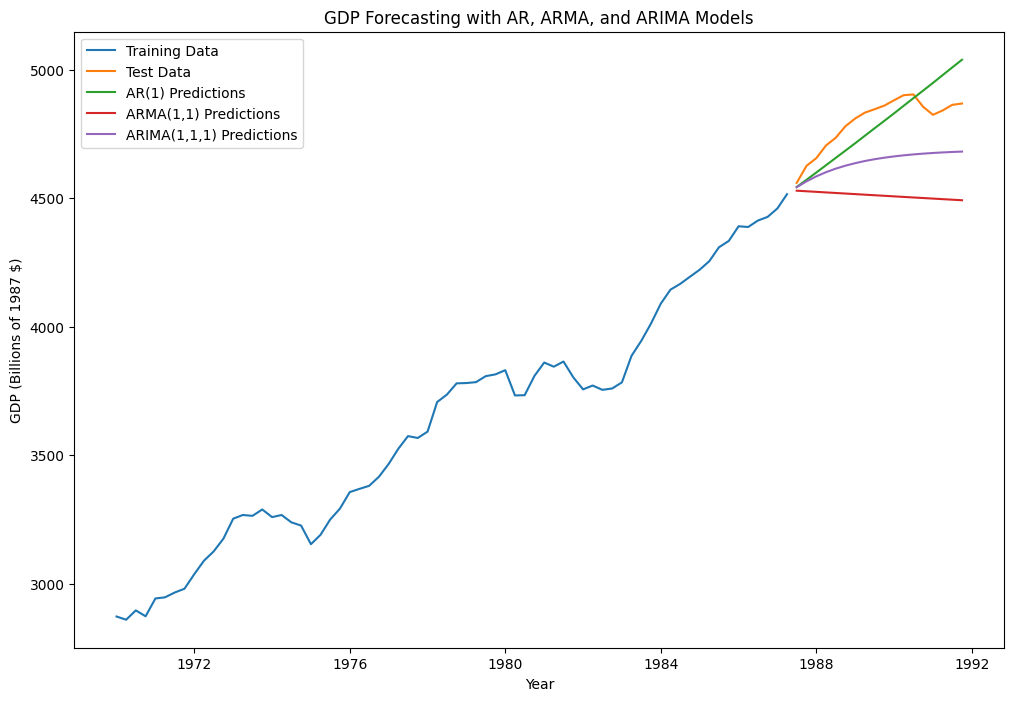

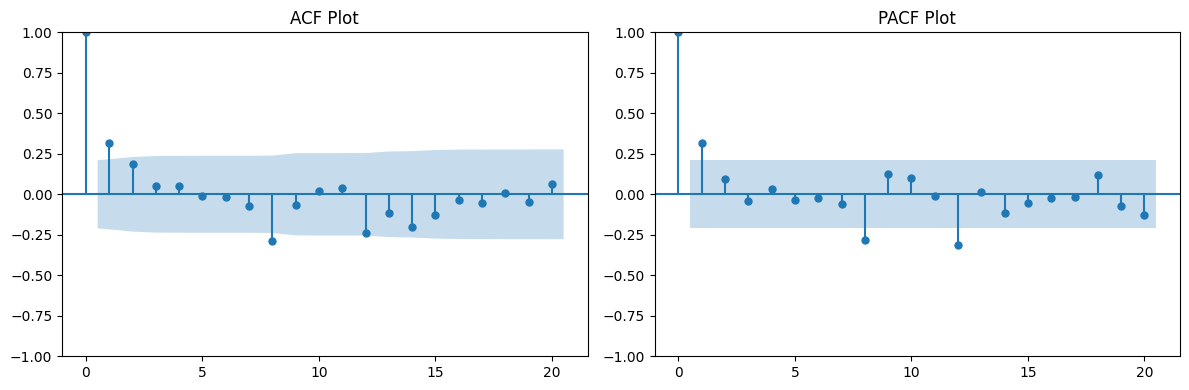


Model Comparison:
AR(1) - AIC: 702.75, BIC: 709.45
ARMA(1,1) - AIC: 732.50, BIC: 741.49
ARIMA(1,1,1) - AIC: 704.14, BIC: 710.84


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from google.colab import files
import io

# Function to read the data from uploaded text
def read_macro_data(file_content):
    lines = file_content.decode('utf-8').split('\n')

    # Find data start
    start_idx = 0
    for i, line in enumerate(lines):
        if line.strip().startswith('YEAR'):
            start_idx = i + 1
            break

    # Process data lines
    data = []
    seen_indices = set()  # To track duplicates
    for line in lines[start_idx:]:
        if line.strip():
            parts = line.split()
            if len(parts) == 6:  # YEAR.quarter + 5 values
                year_quarter = parts[0]  # e.g., "1970.1"
                if year_quarter in seen_indices:
                    print(f"Warning: Duplicate index found: {year_quarter}")
                    continue  # Skip duplicates
                seen_indices.add(year_quarter)
                numeric_data = [float(x) for x in parts[1:]]
                data.append([year_quarter] + numeric_data)

    # Create DataFrame with proper columns
    columns = ['Year', 'GDP', 'PDI', 'PCE', 'PROFITS', 'DIVIDENDS']
    df = pd.DataFrame(data, columns=columns)
    df.set_index('Year', inplace=True)

    # Check for duplicates in the index
    if df.index.duplicated().any():
        print("Duplicates found in index after loading:")
        print(df[df.index.duplicated(keep=False)])
        df = df[~df.index.duplicated(keep='first')]  # Keep first occurrence

    return df

# Upload file
print("Please upload your data file:")
uploaded = files.upload()

if not uploaded:
    print("No file uploaded! Please try again.")
    exit()

file_name = list(uploaded.keys())[0]
file_content = uploaded[file_name]

# Read data
try:
    df = read_macro_data(file_content)
    print("Data loaded successfully!")
    print(df.head())
except Exception as e:
    print(f"An error occurred while reading the file: {e}")
    exit()

# Convert index to proper quarterly datetime format
# Manually construct quarterly periods from "YYYY.Q" format
df.index = pd.to_datetime([f"{year.split('.')[0]}-{(int(year.split('.')[1]) * 3 - 2):02d}-01"
                          for year in df.index])

# Debug output to verify index
print("Index after conversion:")
print(df.index[:5])

# 1. Stationarity Test
def adf_test(series):
    result = adfuller(series.dropna())
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:', result[4])
    if result[1] <= 0.05:
        print("Series is stationary")
    else:
        print("Series is non-stationary")

print("\nADF Test for GDP:")
adf_test(df['GDP'])

# 2. Make series stationary if needed
df['GDP_diff'] = df['GDP'].diff().dropna()

# Split data
train_size = int(len(df) * 0.8)
train, test = df['GDP'][:train_size], df['GDP'][train_size:]

# 3. AR Model
ar_model = AutoReg(train.dropna(), lags=1)
ar_results = ar_model.fit()
ar_pred = ar_results.predict(start=len(train), end=len(train)+len(test)-1)

print("\nAR(1) Model Results:")
print(ar_results.summary())

# 4. ARMA Model
arma_model = ARIMA(train.dropna(), order=(1,0,1))
arma_results = arma_model.fit()
arma_pred = arma_results.predict(start=len(train), end=len(train)+len(test)-1)

print("\nARMA(1,1) Model Results:")
print(arma_results.summary())

# 5. ARIMA Model
arima_model = ARIMA(train.dropna(), order=(1,1,1))
arima_results = arima_model.fit()
arima_pred = arima_results.predict(start=len(train), end=len(train)+len(test)-1)

print("\nARIMA(1,1,1) Model Results:")
print(arima_results.summary())

# 6. Plotting
plt.figure(figsize=(12, 8))
plt.plot(train, label='Training Data')
plt.plot(test, label='Test Data')
plt.plot(ar_pred, label='AR(1) Predictions')
plt.plot(arma_pred, label='ARMA(1,1) Predictions')
plt.plot(arima_pred, label='ARIMA(1,1,1) Predictions')
plt.legend()
plt.title('GDP Forecasting with AR, ARMA, and ARIMA Models')
plt.xlabel('Year')
plt.ylabel('GDP (Billions of 1987 $)')
plt.show()

# 7. ACF and PACF plots
plt.figure(figsize=(12, 4))
plt.subplot(121)
plot_acf(df['GDP_diff'].dropna(), ax=plt.gca())
plt.title('ACF Plot')
plt.subplot(122)
plot_pacf(df['GDP_diff'].dropna(), ax=plt.gca())
plt.title('PACF Plot')
plt.tight_layout()
plt.show()

# 8. Model comparison
print("\nModel Comparison:")
print(f"AR(1) - AIC: {ar_results.aic:.2f}, BIC: {ar_results.bic:.2f}")
print(f"ARMA(1,1) - AIC: {arma_results.aic:.2f}, BIC: {arma_results.bic:.2f}")
print(f"ARIMA(1,1,1) - AIC: {arima_results.aic:.2f}, BIC: {arima_results.bic:.2f}")

In [ ]:
#@title Convert ipynb to HTML in Colab
# Upload ipynb
from google.colab import files
f = files.upload()

# Convert ipynb to html
import subprocess
file0 = list(f.keys())[0]
_ = subprocess.run(["pip", "install", "nbconvert"])
_ = subprocess.run(["jupyter", "nbconvert", file0, "--to", "html"])

# download the html
files.download(file0[:-5]+"html")